In [1]:
# UPLOADING DATA FILE

from google.colab import files

uploaded = files.upload()

Saving master.csv to master.csv


In [2]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import pylab 
import scipy.stats as stats

# Dispaying the data

In [3]:
df = pd.read_csv('master.csv')

display(df)

country  year  ... gdp_per_capita ($)       generation
0         Albania  1987  ...                796     Generation X
1         Albania  1987  ...                796           Silent
2         Albania  1987  ...                796     Generation X
3         Albania  1987  ...                796  G.I. Generation
4         Albania  1987  ...                796          Boomers
...           ...   ...  ...                ...              ...
27815  Uzbekistan  2014  ...               2309     Generation X
27816  Uzbekistan  2014  ...               2309           Silent
27817  Uzbekistan  2014  ...               2309     Generation Z
27818  Uzbekistan  2014  ...               2309     Generation Z
27819  Uzbekistan  2014  ...               2309          Boomers

[27820 rows x 12 columns]

# Printing number of rows and columns

In [4]:
print(df.shape[0])
print(df.shape[1])

27820
12


# Removing redundant columns

In [5]:
df = df.drop(columns='country-year')
display(df)
#df.drop('country-year', axis=1)

country  year  ... gdp_per_capita ($)       generation
0         Albania  1987  ...                796     Generation X
1         Albania  1987  ...                796           Silent
2         Albania  1987  ...                796     Generation X
3         Albania  1987  ...                796  G.I. Generation
4         Albania  1987  ...                796          Boomers
...           ...   ...  ...                ...              ...
27815  Uzbekistan  2014  ...               2309     Generation X
27816  Uzbekistan  2014  ...               2309           Silent
27817  Uzbekistan  2014  ...               2309     Generation Z
27818  Uzbekistan  2014  ...               2309     Generation Z
27819  Uzbekistan  2014  ...               2309          Boomers

[27820 rows x 11 columns]

# Printing the datatypes

In [6]:
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

# Rectifying a few datatypes

In [7]:
def convertint(gdp):
  x = gdp.split(',')
  x = map(int,x)
  final = 0
  for num in x:
    final = final*1000 + num
  return final

In [8]:
df[' gdp_for_year ($) '] =df[' gdp_for_year ($) '].map(lambda x: convertint(x))
df[' gdp_for_year ($) ']

0         2156624900
1         2156624900
2         2156624900
3         2156624900
4         2156624900
            ...     
27815    63067077179
27816    63067077179
27817    63067077179
27818    63067077179
27819    63067077179
Name:  gdp_for_year ($) , Length: 27820, dtype: int64

In [9]:
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
HDI for year          float64
 gdp_for_year ($)       int64
gdp_per_capita ($)      int64
generation             object
dtype: object

# Finding number of missing entries and unique values 

In [10]:
for col in df.columns.values:
  print('no. of missing entries in ' + col + ' is: ' + str(np.sum(pd.isnull(df[col]))))

no. of missing entries in country is: 0
no. of missing entries in year is: 0
no. of missing entries in sex is: 0
no. of missing entries in age is: 0
no. of missing entries in suicides_no is: 0
no. of missing entries in population is: 0
no. of missing entries in suicides/100k pop is: 0
no. of missing entries in HDI for year is: 19456
no. of missing entries in  gdp_for_year ($)  is: 0
no. of missing entries in gdp_per_capita ($) is: 0
no. of missing entries in generation is: 0


In [11]:
for col in df.columns.values:
  list_vals = pd.unique(df[col])
  print(col + ' is of type ' + str(df[col].dtypes) + ', has ' + str(len(list_vals)) + ' unique values')
  if len(list_vals) < 10:
    list_str = ''
    for n_value in range(0,len(list_vals)):
      list_str = list_str + str(list_vals[n_value]) + ', '
    print('  These are: '+list_str[0:len(list_str)-2])
  print('\n')

country is of type object, has 101 unique values


year is of type int64, has 32 unique values


sex is of type object, has 2 unique values
  These are: male, female


age is of type object, has 6 unique values
  These are: 15-24 years, 35-54 years, 75+ years, 25-34 years, 55-74 years, 5-14 years


suicides_no is of type int64, has 2084 unique values


population is of type int64, has 25564 unique values


suicides/100k pop is of type float64, has 5298 unique values


HDI for year is of type float64, has 306 unique values


 gdp_for_year ($)  is of type int64, has 2321 unique values


gdp_per_capita ($) is of type int64, has 2233 unique values


generation is of type object, has 6 unique values
  These are: Generation X, Silent, G.I. Generation, Boomers, Millenials, Generation Z




In [12]:
group1 = df.groupby(['country']).mean()
group2 = group1.reset_index()
for item in ['United Kingdom', 'United States', 'Japan', 'Italy', 'Mexico', 'Spain']:
  print("Avg population of ", item, "is ", int(group2[group2['country'] == item]['population'].iloc[0]*12))

Avg population of  United Kingdom is  56089283
Avg population of  United States is  259807329
Avg population of  Japan is  118742736
Avg population of  Italy is  55323990
Avg population of  Mexico is  89450295
Avg population of  Spain is  39601970


# Grouping data w.r.t countries and finding the average suicide rate per year

# Following are the 6 countries

In [13]:
countries = ['United Kingdom', 'United States', 'Japan', 'Italy', 'Mexico', 'Spain']
for item in countries:
  print(df[df['country'] == item].groupby('year').count())

      country  sex  age  ...   gdp_for_year ($)   gdp_per_capita ($)  generation
year                     ...                                                    
1985       12   12   12  ...                  12                  12          12
1986       12   12   12  ...                  12                  12          12
1987       12   12   12  ...                  12                  12          12
1988       12   12   12  ...                  12                  12          12
1989       12   12   12  ...                  12                  12          12
1990       12   12   12  ...                  12                  12          12
1991       12   12   12  ...                  12                  12          12
1992       12   12   12  ...                  12                  12          12
1993       12   12   12  ...                  12                  12          12
1994       12   12   12  ...                  12                  12          12
1995       12   12   12  ...

In [14]:
for item in countries:
  my1 = df[df['country'] == item].groupby('year').sum()
  my2 = my1['suicides_no']/my1['population']*100000
  print("Mean of suicides/100k population for ", item, " is ", np.mean(my2))
  print("Variance of suicides/100k population for ", item, " is ", np.var(my2))
  print("Std Dev of suicides/100k population for ", item, " is ", np.std(my2), "\n")
  

Mean of suicides/100k population for  United Kingdom  is  7.88408269143015
Variance of suicides/100k population for  United Kingdom  is  0.45616005037529456
Std Dev of suicides/100k population for  United Kingdom  is  0.6753962173237977 

Mean of suicides/100k population for  United States  is  12.835303001368596
Variance of suicides/100k population for  United States  is  0.7974128784061502
Std Dev of suicides/100k population for  United States  is  0.8929797749143875 

Mean of suicides/100k population for  Japan  is  21.886203187001176
Variance of suicides/100k population for  Japan  is  10.352719638815463
Std Dev of suicides/100k population for  Japan  is  3.2175642400448607 

Mean of suicides/100k population for  Italy  is  7.712660437386648
Variance of suicides/100k population for  Italy  is  0.46566413378674787
Std Dev of suicides/100k population for  Italy  is  0.6823958776155875 

Mean of suicides/100k population for  Mexico  is  3.858872958958654
Variance of suicides/100k popu

# Plotting Q-Q plots for these countries to check if the yearly rates of suicide are Gaussian distributed, as six different single variables.

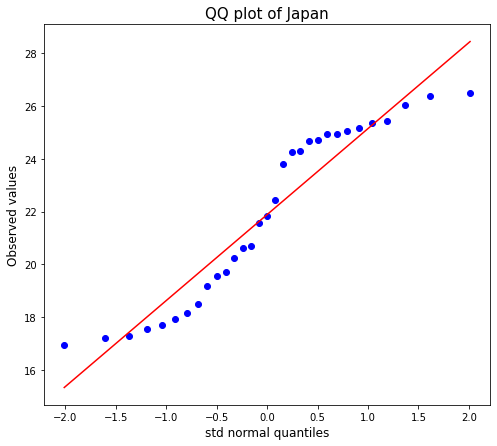

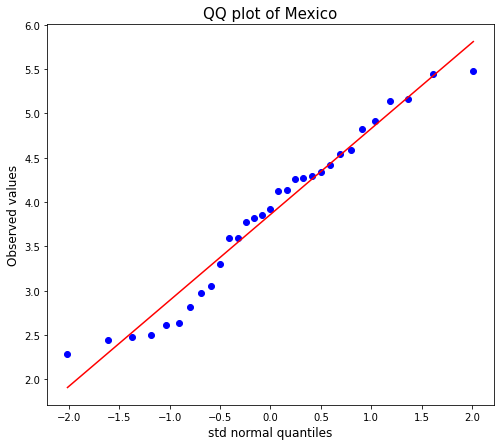

In [15]:
for item in countries:
  my3 = df[df['country'] == item].groupby('year').sum()
  my4 = my3['suicides_no']/my3['population']*100000
  arr1 = np.array(my4)
  plt.figure(figsize=(8,7))
  stats.probplot(arr1, dist="norm", plot=plt)
  plt.title(str("QQ plot of " + item), fontsize=15)
  plt.xlabel('std normal quantiles', fontsize=12)
  plt.ylabel('Observed values', fontsize=12)
  plt.show()
  print("\n")

### OBSERVATION
Distribution for Spain seems to be the closest to normal Gaussian and that of Japan seems farthest from Gaussian

# Comparing the log-likelihoods of the data for each country

In [16]:
def normpdf(x, mean, sd):
    var = float(sd)**2
    denom = (2*np.pi*var)**.5
    num = np.exp(-(float(x)-float(mean))**2/(2*var))
    return num/denom

for item in countries:
  MLL = 0
  my5 = df[df['country'] == item].groupby('year').sum()
  my6 = my5['suicides_no']/my5['population']*100000

  for val in my6.values:
    MLL += np.log(normpdf(val, np.mean(my6), np.std(my6))) 
  print(item, " ", MLL, "\n")

United Kingdom   -31.820965606886766 

United States   -40.478162777483135 

Japan   -80.21445793890176 

Italy   -32.14058949056136 

Mexico   -41.889272801351716 

Spain   -23.955917448838292 



### INFERENCE
Clearly MLL is highest for Spain and lowest for Japan as expected.

# Determining 95% C.I. of the mean yearly suicide rates for each of these countries

In [17]:
for item in countries:
  my7 = df[df['country'] == item].groupby('year').sum()
  my8 = my7['suicides_no']/my7['population']*100000
  print(item, " ", stats.t.interval(0.95, len(np.array(my8))-1, loc=np.mean(np.array(my8)), scale=stats.sem(np.array(my8))))

United Kingdom   (7.63225024947026, 8.135915133390045)
United States   (12.502340998370475, 13.168265004366717)
Japan   (20.686482135935748, 23.08592423806661)
Italy   (7.458218058475737, 7.967102816297558)
Mexico   (3.510404383059563, 4.207341534857746)
Spain   (7.968713911190856, 8.359515467745585)


# Using Welch’s t-test and Wilcoxon signed-rank test, confirm if the mean suicide rates of UK and Italy are really different from each other

### NULL HYPOTHESIS : not different from each other
### ALTERNATE HYPOTHESIS: different from each other

### yes means we can reject the null hypothesis and no means we cannot reject the null hypothesis

In [18]:
my9 = df[df['country'] == 'United Kingdom'].groupby('year').sum()
my10 = np.array(my9['suicides_no']/my9['population']*100000)

my11 = df[df['country'] == 'Italy'].groupby('year').sum()
my12 = np.array(my11['suicides_no']/my11['population']*100000)
ans1 = stats.ttest_ind(my10, my12, equal_var = False)
print(ans1[0], ans1[1])
if ans1[0]>ans1[1]:
  print("YES")
else:
  print["NO"]

ans2 = stats.wilcoxon(my10, my12)
print(ans2[0], ans2[1])
if ans2[0]>ans2[1]:
  print("YES")
else:
  print["NO"]



0.9779210170187137 0.3320404268870718
YES
149.0 0.05237264648396437
YES


# Repeating the previous part with an appropriate paired test :  Wilcoxon rank-sum test (non-parametric)

In [26]:
ans3 = stats.ranksums(my10, my12)
print(ans3[0], ans3[1])
if ans3[0]>ans3[1]:
  print("YES")
else:
  print["NO"]

0.6264965235807524 0.5309893164049438
YES


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


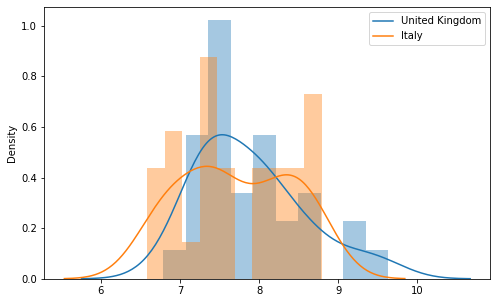

In [25]:
plt.figure(figsize=(8,5))
sb.distplot(my10, bins=10)
sb.distplot(my12, bins=10)
plt.legend(['United Kingdom','Italy'])
plt.show()

# Correlation of yearly suicide rate with human development index (HDI) and GDP per capita

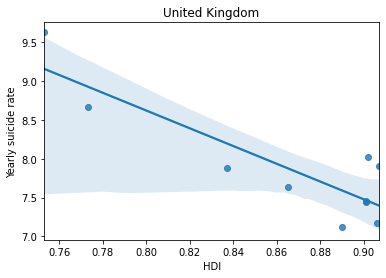

-0.8652517399077361




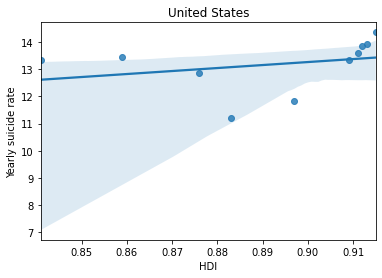

0.29195464345250455




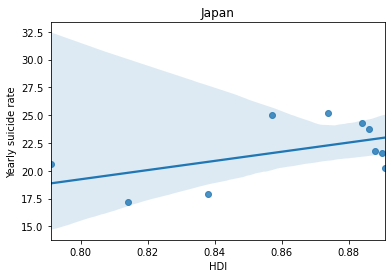

0.5210763496262621




-0.8613314673564011




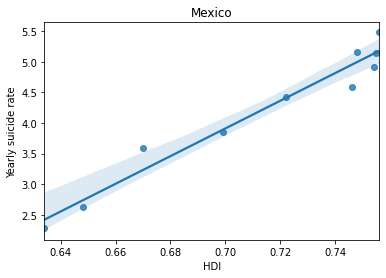

0.9783684386138864




0.32754174973298456




In [21]:
for item in countries:
  my13 = df[df['country'] == item].groupby('year').sum()
  my14 = np.array(my13['suicides_no']/my13['population']*100000)
  my15 = np.array(df[df['country'] == item].groupby('year').mean()['HDI for year'])
  sb.regplot(x=my15, y=my14)
  plt.title(str(item), fontsize=12)
  plt.xlabel('HDI')
  plt.ylabel('Yearly suicide rate')
  plt.show()
  my16 = []
  my17 = []
  for i in range(0, len(my14)):
    if my15[i] > 0:
      my16.append(my14[i])
      my17.append(my15[i])
  ans4 = stats.pearsonr(my17, my16)
  print(ans4[0])
  print("\n")

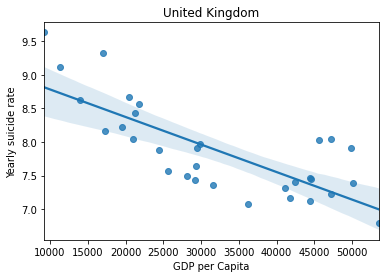

-0.7709229981372078




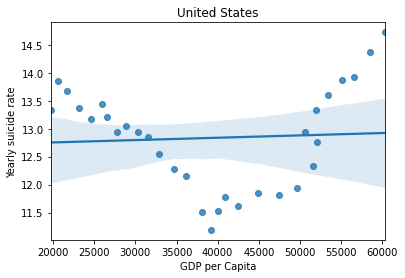

0.05782770992998887




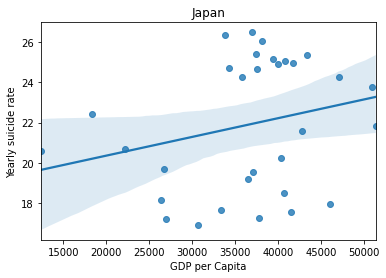

0.2493186641253242




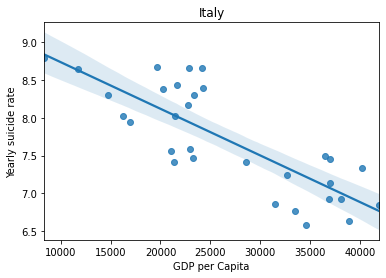

-0.8058989652804357




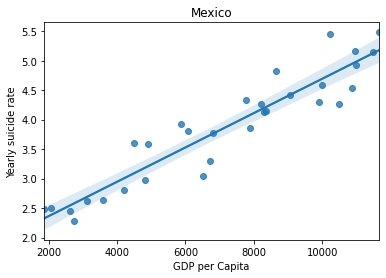

0.9392731898535474




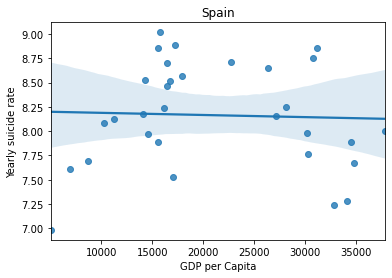

-0.038634407247479526




In [22]:
for item in countries:
  my13 = df[df['country'] == item].groupby('year').sum()
  my14 = np.array(my13['suicides_no']/my13['population']*100000)
  my15 = np.array(df[df['country'] == item].groupby('year').mean()['gdp_per_capita ($)'])
  sb.regplot(x=my15, y=my14)
  plt.title(str(item), fontsize=12)
  plt.xlabel('GDP per Capita')
  plt.ylabel('Yearly suicide rate')
  plt.show()
  ans5 = stats.pearsonr(my15, my14)
  print(ans5[0])
  print("\n")